### Import Libraries

In [1]:
import re
import cv2 
import numpy as np 
import pytesseract 
from pytesseract import Output
import matplotlib.pyplot as plt

### Preprocessing Functions

In [2]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

### Load Original Image

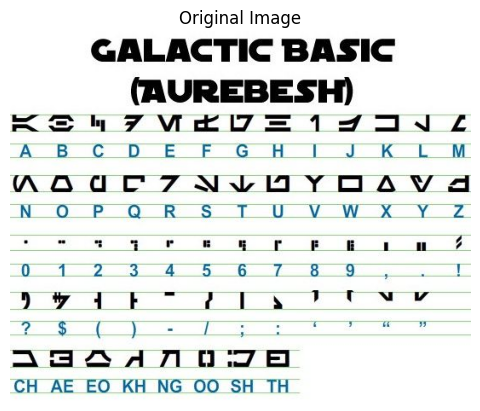

In [3]:
image = cv2.imread('./Dataset/aurebesh.jpg')
b,g,r= cv2.split(image)
rgb_img = cv2.merge([r, g, b])
plt.imshow(rgb_img)
plt.title('Original Image')
plt.axis('off')
plt.show()


### Preprocessing

In [4]:
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

# Store all preprocessed image on dictionary for easy access
images = { 
	'gray': gray, 
	'thresh': thresh, 
	'opening': opening, 
	'canny': canny
}

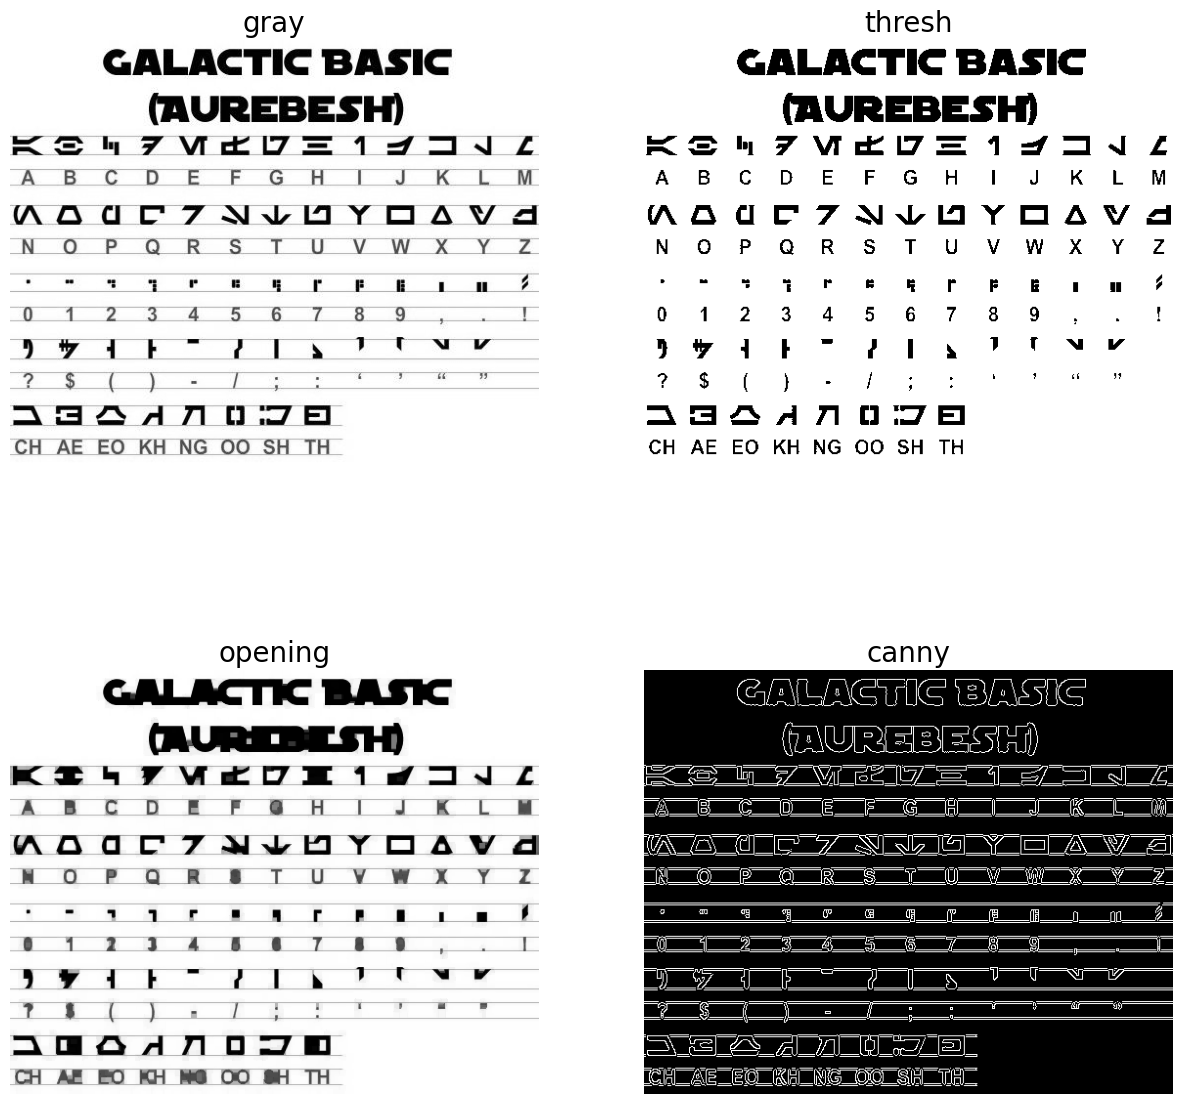

In [6]:
fig = plt.figure(figsize=(15, 15))
ax = []

rows = 2
columns = 2

keys = list(images.keys())
for i in range(rows*columns):
	ax.append( fig.add_subplot(rows, columns, i+1) )
	ax[-1].set_title(keys[i], fontsize=20)
	plt.imshow(images[keys[i]], cmap='gray')
	plt.axis('off')

### Output

In [9]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images['thresh'], config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images['opening'], config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images['canny'], config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
GALACTIC BASIC
(AVREBESH)

RS 7FVMeEVEi1i fol Z
A B C DE F GH IJ K LM
AOdCeUT7TNVTOoOYOAVA
N OO P Q@R S$ TU VW XK Y¥ Z
"os 3 3 rm 8 fo Pf F Bo a om #
0 12 3 4 5 6 7 8 9 , . !
i A rd re
2 S$ ( Foe Fo gor ht roe
AadSANDIe
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREZBEILSH)
KEE VTMEUEiwoayvs
A BC D FE F @ H [| J K CL
AOadr7WTt HYOAYV 4
WO P Q R 8S T U VW WK y Z
‘5 a aor es ln lp le ce
1 2 a a4 8 8 7 Sb Ps,
VY itr-~ -yrp»pTttYY
2 ty ee eg Ee Se
AGoOAn